In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [3]:
name = "headphones3.jpg"
original_image = cv2.imread(name)

In [4]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
attempts=10
ret,label,center=cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

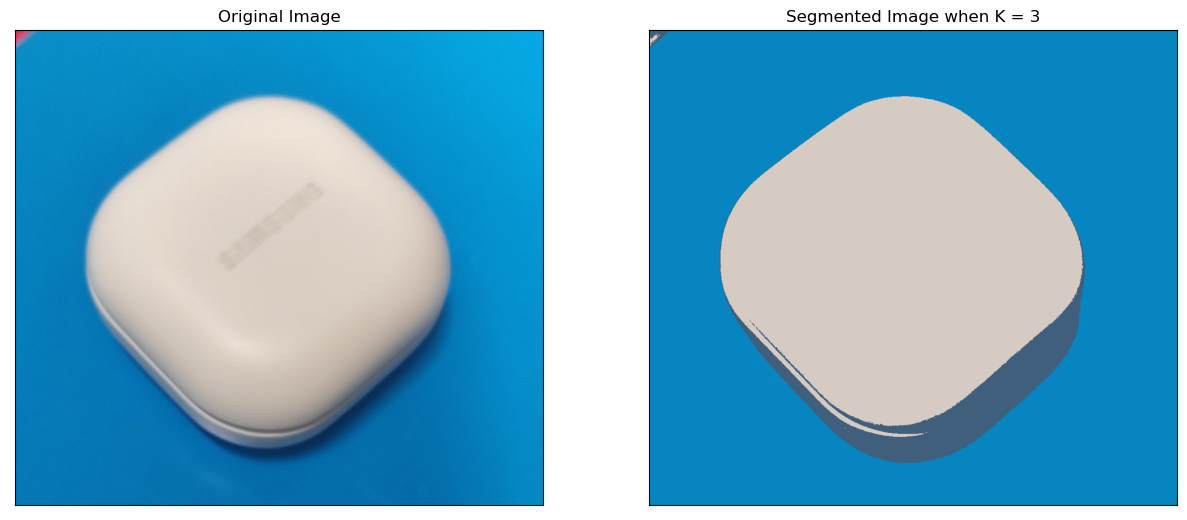

In [5]:
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
center

array([[214, 203, 194],
       [  6, 133, 192],
       [ 64,  95, 125]], dtype=uint8)

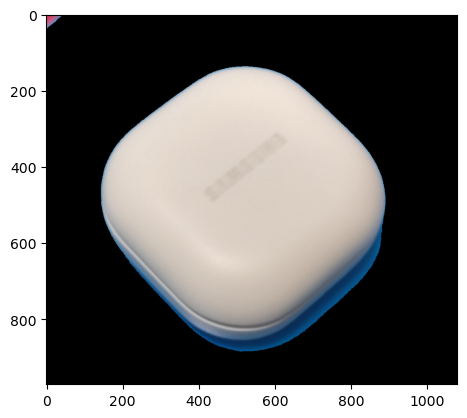

In [7]:
first_color = (64,  95, 125)
second_color = (214, 203, 194)
mask = cv2.inRange(result_image, first_color, second_color)
result = cv2.bitwise_and(original_image, original_image, mask=mask)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result)
plt.show()



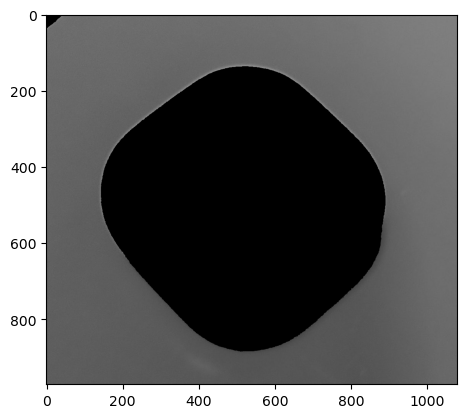

In [8]:
first_color = (6, 133, 192)
second_color = (6, 133, 192)
mask2 = cv2.inRange(result_image, first_color, second_color)
result_gray = cv2.bitwise_and(original_image, original_image, mask=mask2)
result_gray = cv2.cvtColor(result_gray, cv2.COLOR_BGR2GRAY)
result_gray = cv2.cvtColor(result_gray, cv2.COLOR_GRAY2RGB)
plt.imshow(result_gray)
plt.show()

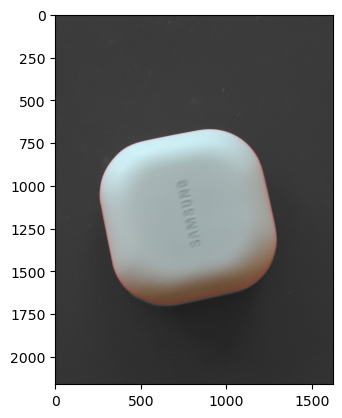

In [43]:
dst = cv2.addWeighted(result_gray, 1, result, 1, 0.0)
plt.imshow(dst)
plt.show()